In [1]:
import numpy as np
import matplotlib.pyplot as plt
import systemb_code as sbc

### Make Fig.3(b) panel

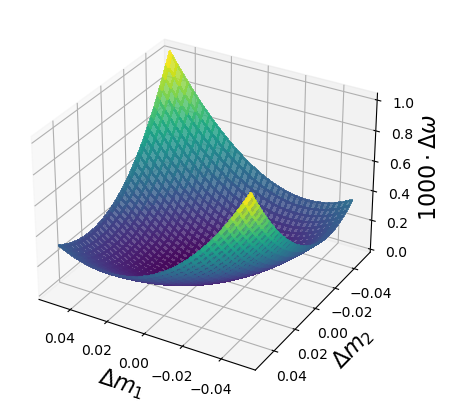

In [11]:
k0s = [1., 1.]
angles = [np.pi/3, np.pi/3]
m0s = [1., 1.]

dm1s = np.linspace(-0.05, 0.05, 101)
dm2s = np.linspace(-0.05, 0.05, 101)

diffs = sbc.spectrum_single_surfaces(k0s = k0s, angles = angles, m0s = m0s, dm1s = dm1s, dm2s = dm2s, plot = True, 
                                     save_file = "systemb_spectrum.svg", azim = 120)

### Make Fig.3(c) panel 

In [12]:
k0s = [1., 1.]
angles = [np.pi/3, np.pi/3]

#define the configuration space of interest
m0s = [1., 1.]
dm1s = np.linspace(-0.05,0.05,100)
dm2s = np.linspace(-0.05,0.05,100)

dk1s = np.array([0, 1, 2, 4, 8, 16]) * 2e-5

#define the maximum number of iterations
max_it = 20
#define the precision of the search
prec_it = 1e-12

wplocs_list = []
charges_list = []

for i in range(len(dk1s)):
    
    k0s = [1., 1.]
    dk1 = dk1s[i]
    
    k0s[0] += dk1
    
    wplocs = sbc.all_point_finder(k0s = k0s, angles = angles, search_it = 20, max_it = max_it, 
                                  prec_it = prec_it, loc_threshold = 1e-11, freq_threshold = 1e-13)
    
    charges = sbc.charge_calc(k0s = k0s, angles = angles, wplocs = wplocs, method = "winding")
    
    wplocs_list.append(wplocs)
    charges_list.append(charges)

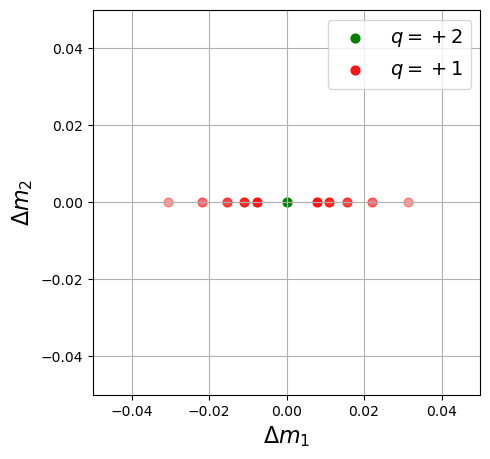

In [15]:
#create a figure
fig = plt.figure(figsize = (5,5))

#get the region of the parameter space in which we investigated the weyl points
xextent = [ np.min(dm1s),  np.max(dm1s)]
yextent = [ np.min(dm2s),  np.max(dm2s)]

#set the corresponding limits on the axis
plt.xlim(xextent)
plt.ylim(yextent)

#add labels to the axis
plt.xlabel(r"$ \Delta m_1$", fontsize = 16)
plt.ylabel(r"$ \Delta m_2$", fontsize = 16)

plt.grid(True)

for i in range(len(wplocs_list)):
    wplocs = wplocs_list[i]
    charges = charges_list[i]
    
    for j in range(len(wplocs)):

        #get the x y coordinates of the degeneracy point
        x, y = wplocs[j]

        #get the charge of the degeneracy point
        charge = charges[j]

        #color the plot based on the charge of the degeneracy point
        if np.abs(charge - 2.) <= 1e-4:
            color = "green"
        elif np.abs(charge - 1.) <= 1e-4:
            color = "red"
        elif np.abs(charge) <= 1e-4:
            color = "white"
        elif np.abs(charge + 1.) <= 1e-4:
            color = "blue"
        elif np.abs(charge + 2.) <= 1e-4:
            color = "brown"
        else:
            print("Error? The charge of the degeneracy is not among the possibilities")

        #and then add a point to the figure
        plt.scatter(x - m0s[0], y - m0s[1], s = 40, c = color, alpha = 1 / (1+5e3*dk1s[i]))

plt.legend([r"$q = +2$",r"$q=+1$"], fontsize = 14)

plt.savefig("../figures/WP_splitting_v1.svg", dpi = 1200, bbox_inches = "tight")